In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
df = json.load(open("clusts/cs_23_I_max_2hp_10gc_new2_mfe_5000.json"))
sns.set_style("darkgrid")

In [3]:
len(df['clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing0.fasta'])

5000

In [4]:
out = {}
print(df)
for key, value in df.items():
    print(f"{key}, min {np.mean(value)}, std {np.std(value)}, max {np.max(value)}")
    out[key] = np.mean(value)
#print(df)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing0.fasta


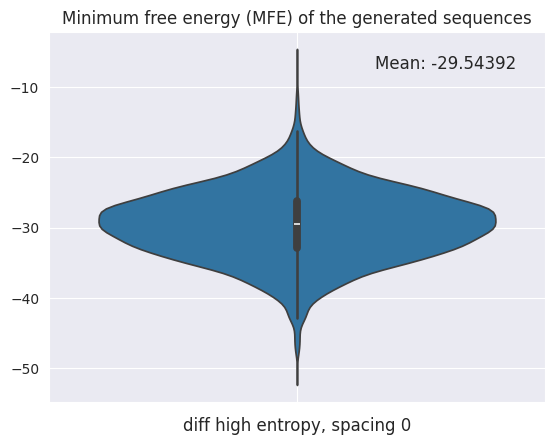

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing4_payloadxor.fasta


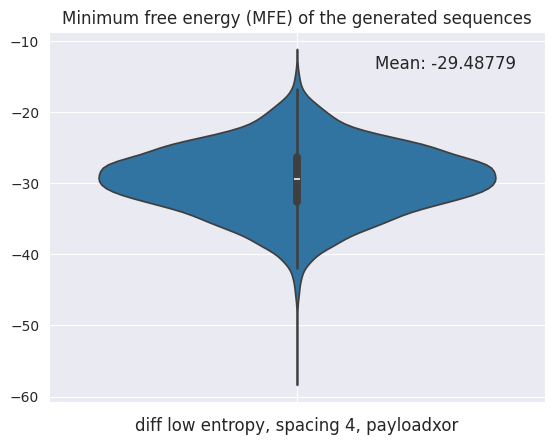

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing0_payloadxor.fasta


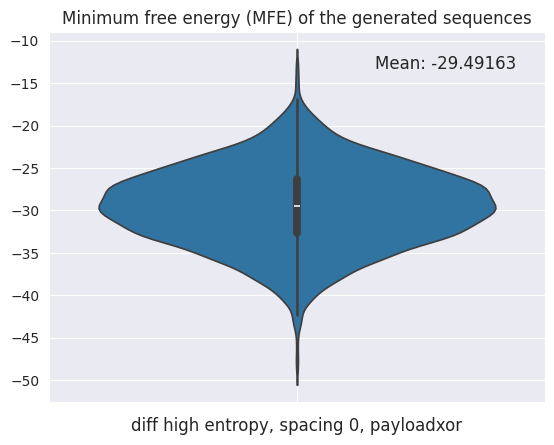

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing4.fasta


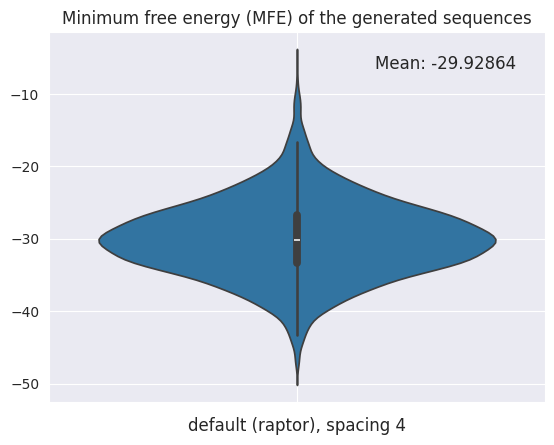

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing2.fasta


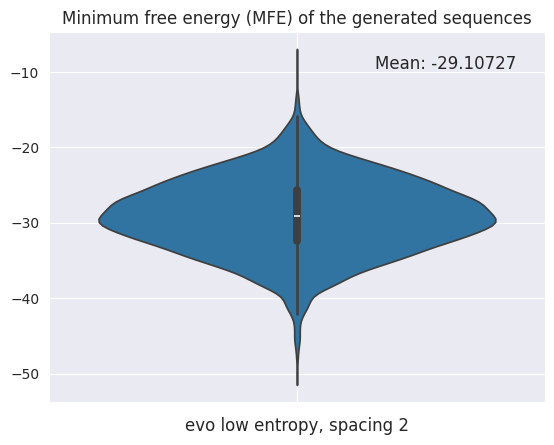

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing4_payloadxor.fasta


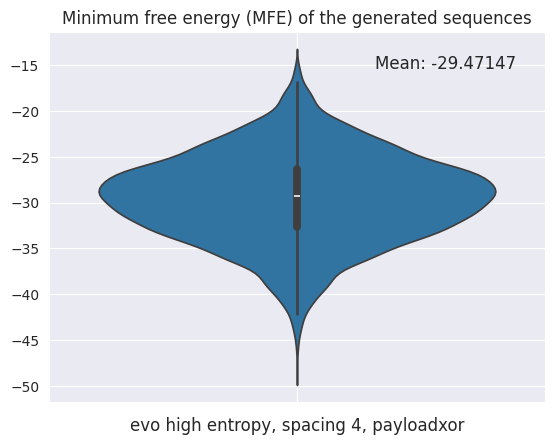

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing2_payloadxor.fasta


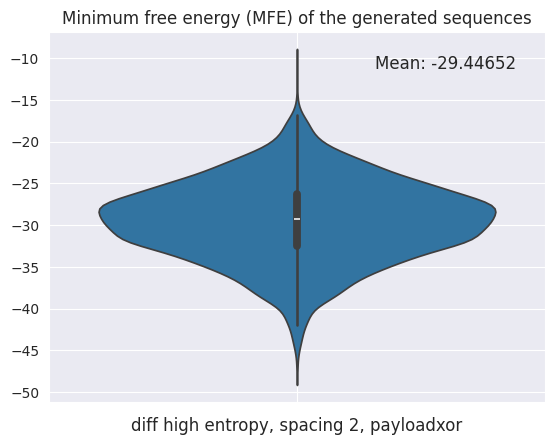

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing4_payloadxor.fasta


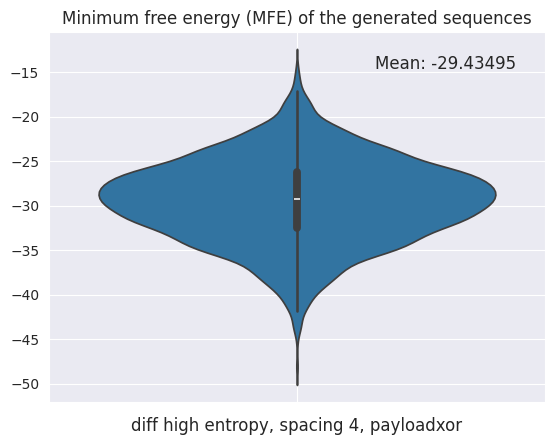

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing2_payloadxor.fasta


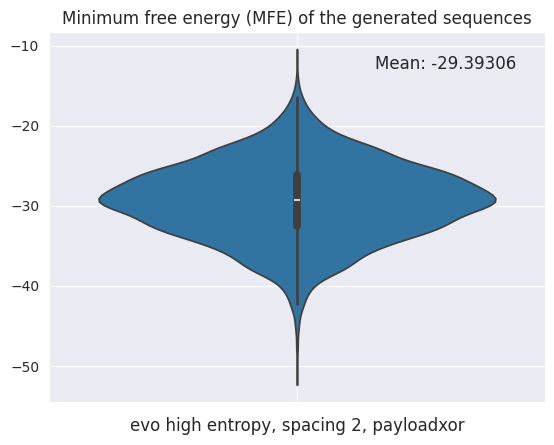

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing2.fasta


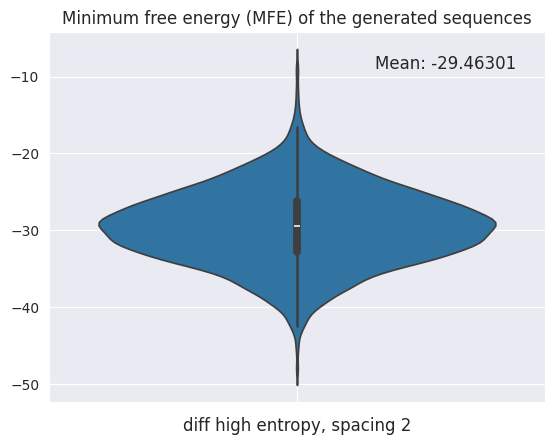

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing0_payloadxor.fasta


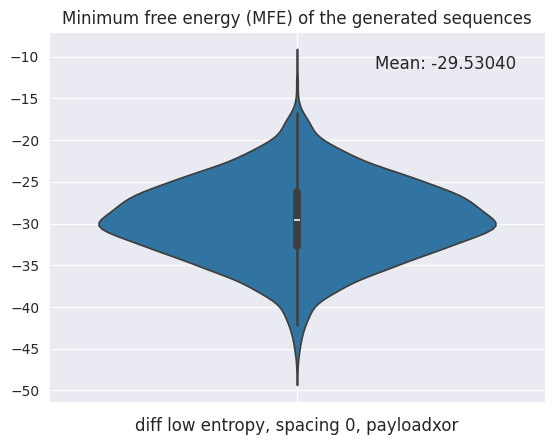

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing0_payloadxor.fasta


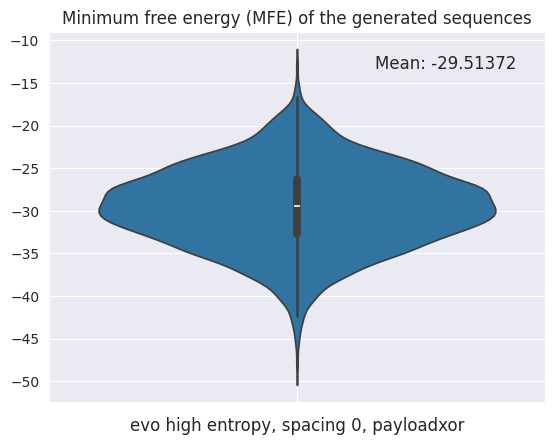

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing0.fasta


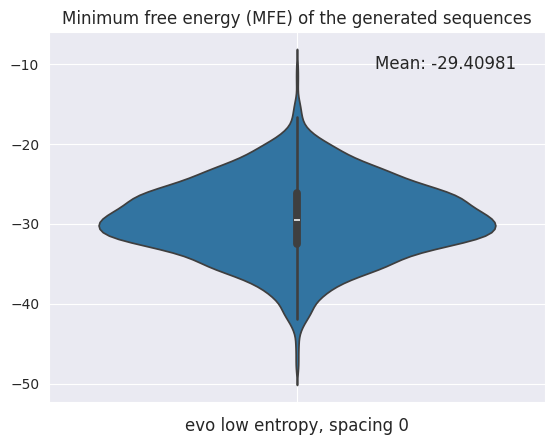

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing4.fasta


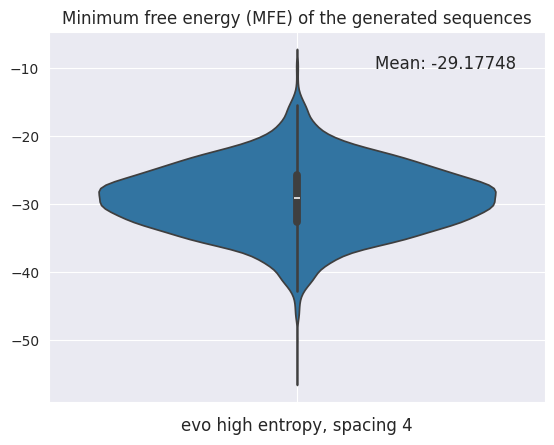

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing2_payloadxor.fasta


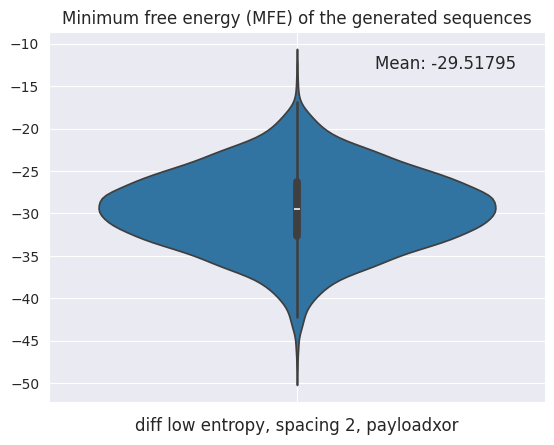

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing4.fasta


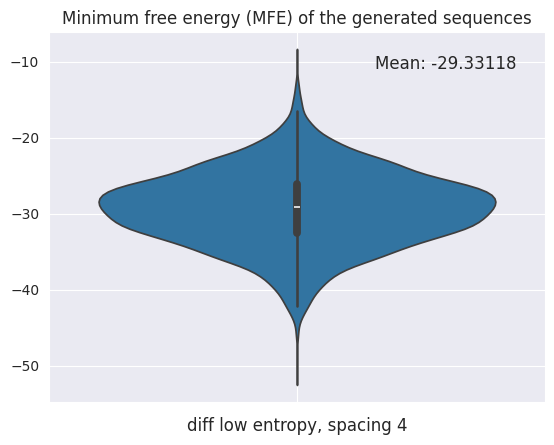

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing4.fasta


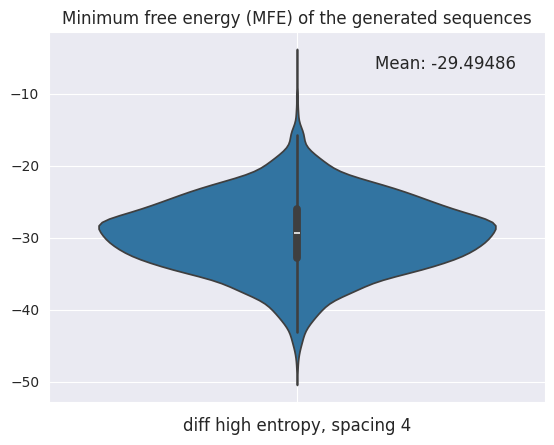

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing4_payloadxor.fasta


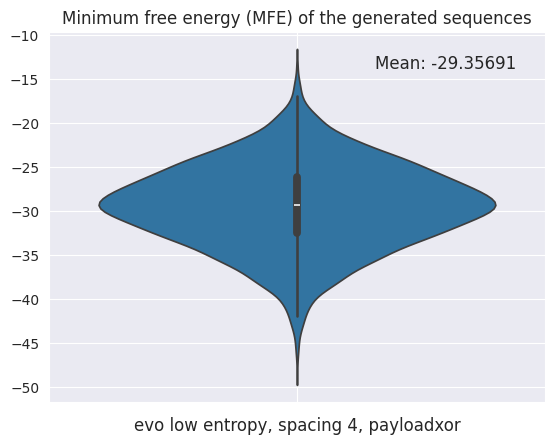

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing0_payloadxor.fasta


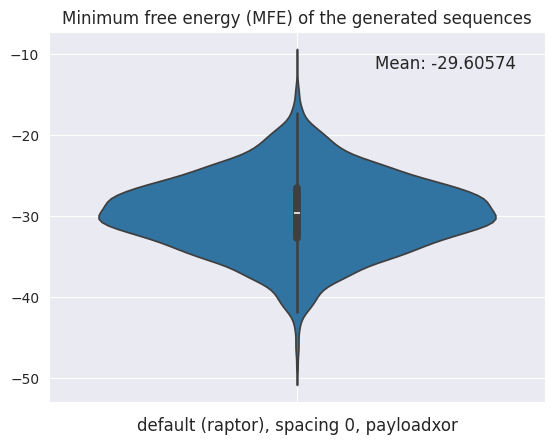

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing0.fasta


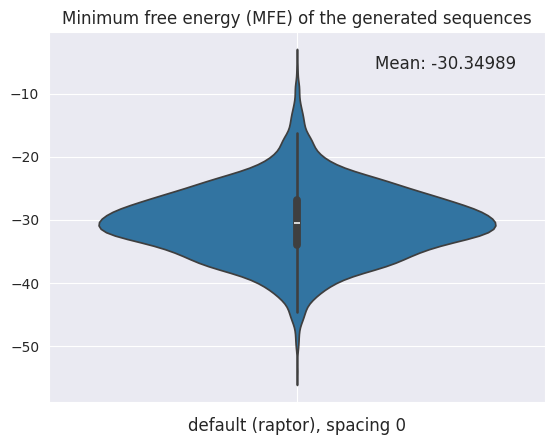

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing2.fasta


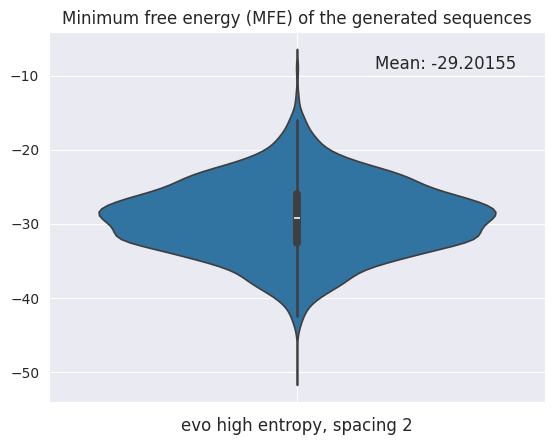

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing2_payloadxor.fasta


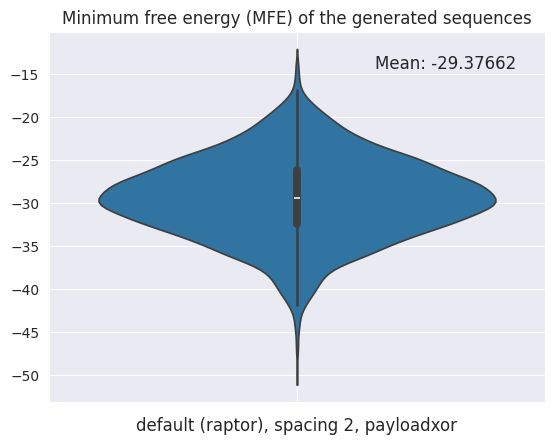

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing2.fasta


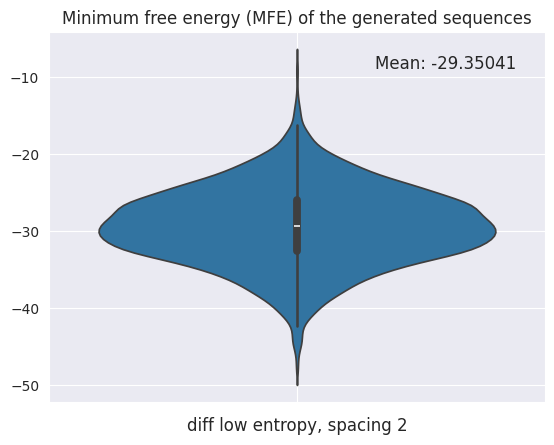

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing4_payloadxor.fasta


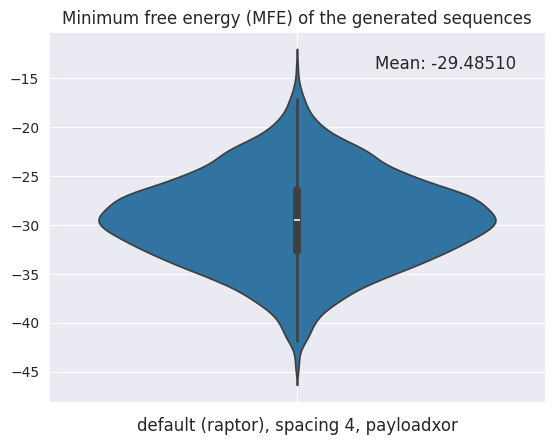

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing0_payloadxor.fasta


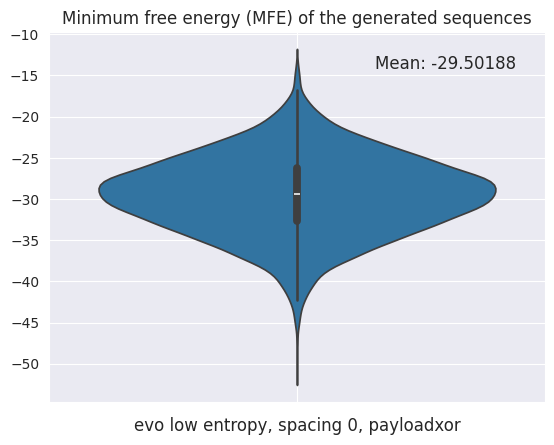

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing4.fasta


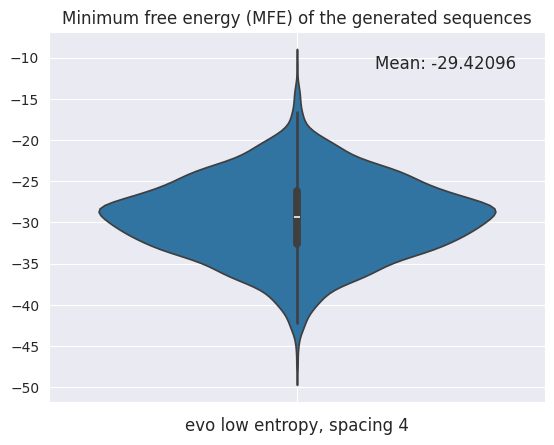

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing0.fasta


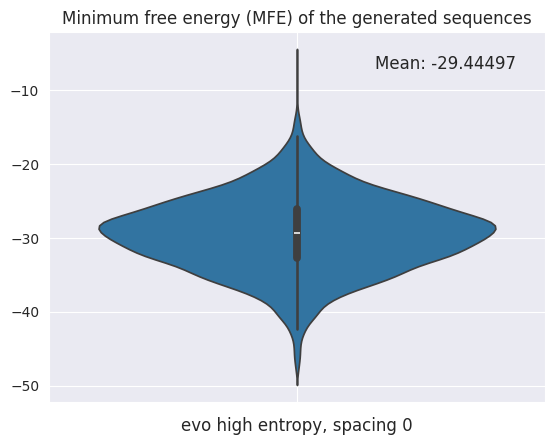

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing2.fasta


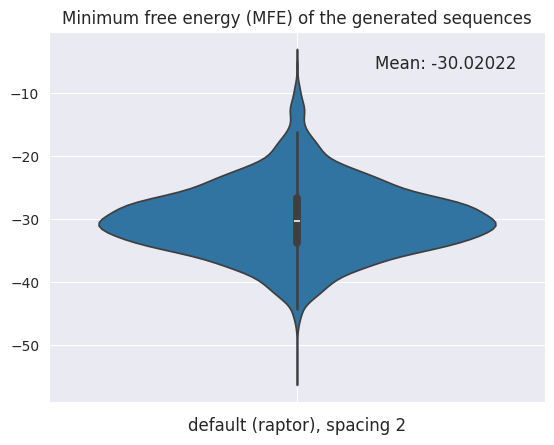

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing2_payloadxor.fasta


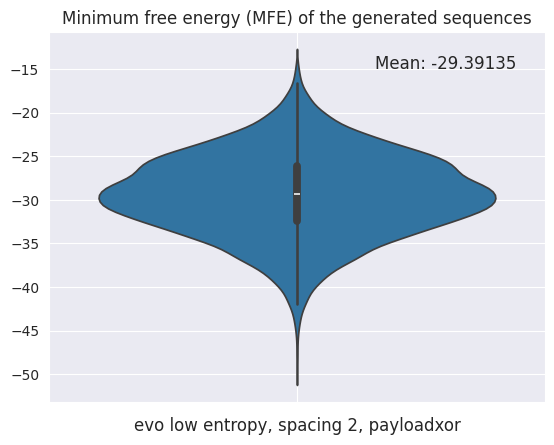

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing0.fasta


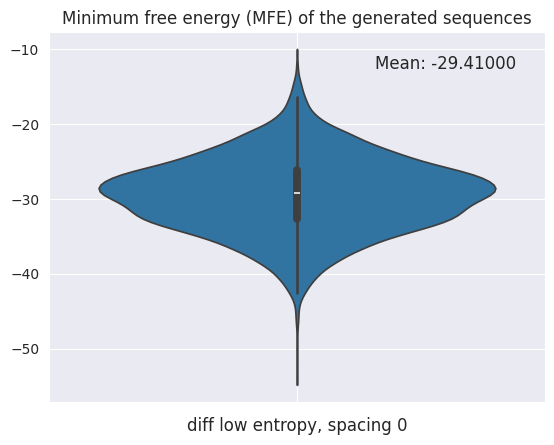

clusts/sleeping_beauty_grass.fasta


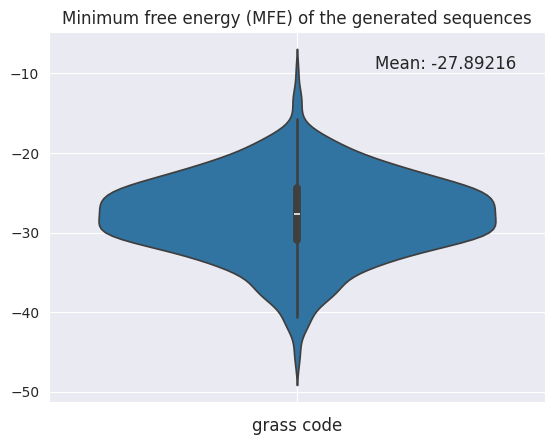

clusts/sleeping_beauty_dna_fountain_cs23.fasta


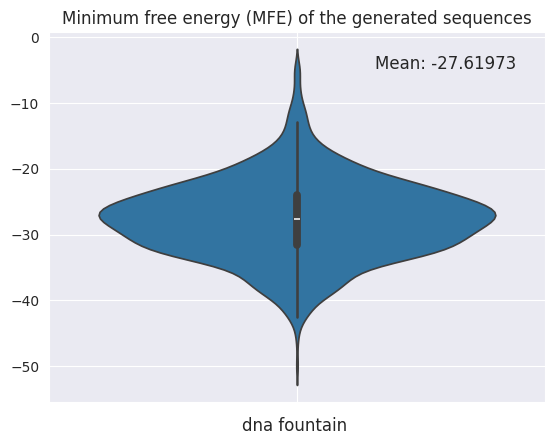

clusts/sleeping_beauty_dna_fountain_24.fasta


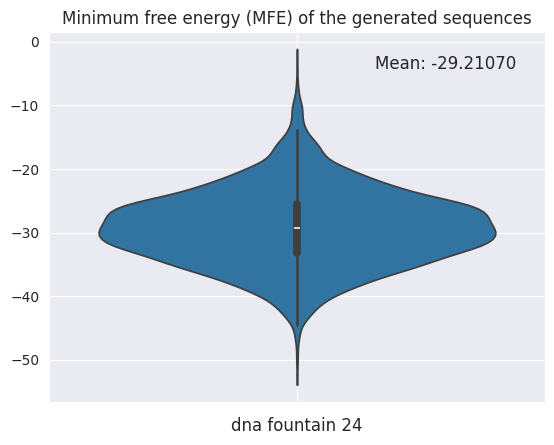

In [5]:
for key, value in df.items():
    # create a violin plot usin seaborn:
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    sns.violinplot(data=df[key], ax=ax)
    print(key)
    try:
        conf_name = key.split('sleeping_beauty_150_')[1] 
        key_title = conf_name.replace("compress_encrypt_high_entropy_dist","high entropy,").replace("bmp_low_entropy_diff_dist", "diff low entropy,").replace("bmp_low_entropy_evo_dist", "evo low entropy,").replace("raptor", "default (raptor),")
    except:
        conf_name = key.replace("clusts/", "")
        key_title = conf_name
    key_title = key_title.replace("sleeping_beauty_", "").replace("seedspacing", "spacing ").replace('_', ' ').replace(" payloadxor", ", payloadxor").replace('.fasta', '').replace("grass", "grass code").replace("cs23", "")
        # Add the mean value to the plot using plt.text()
    plt.text(0.8, 0.9, f"Mean: {out[key]:.5f}", transform=ax.transAxes, fontsize=12, ha='center')
    
    #plt.title(f"{key_title}")
    plt.title("Minimum free energy (MFE) of the generated sequences")
    plt.xlabel(key_title, fontsize=12)
    plt.grid(True)
    plt.savefig(f"clusts/mfe_plot/mfe_violin_{conf_name}.svg", format="svg", dpi=1200)
    plt.savefig(f"clusts/mfe_plot/mfe_violin_{conf_name}.pdf", bbox_inches="tight")
    plt.show()
    

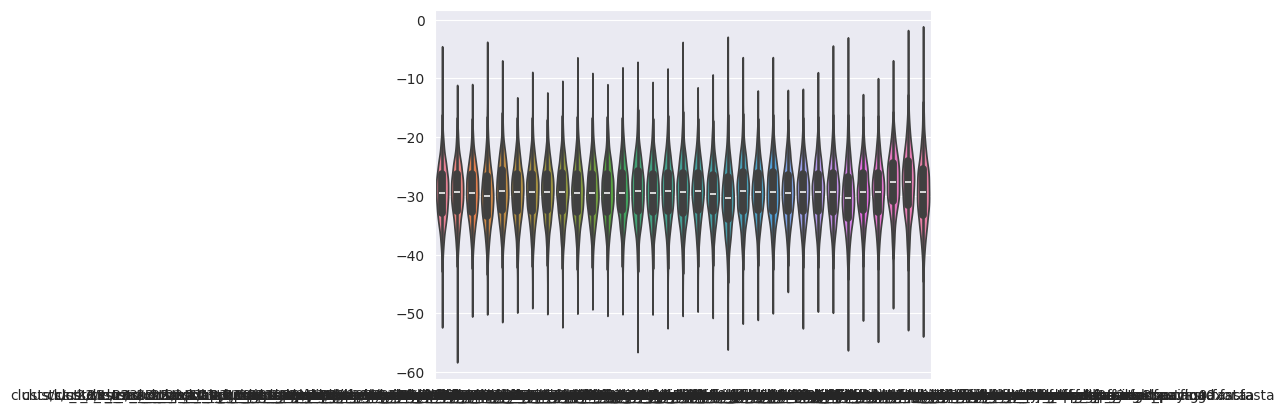

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing0.fasta
clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing4_payloadxor.fasta
clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing0_payloadxor.fasta
clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing4.fasta
clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing2.fasta
clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing4_payloadxor.fasta
clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing2_payloadxor.fasta
clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing4_payloadxor.fasta
clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing

,dist,spacing,payloadxor,combination,mfe
0,diff high entropy,0,False,"diff high entropy, spacing 0","[-6.367171287536621, -8.79537296295166, -10.78..."
1,diff low entropy,4,True,"diff low entropy, spacing 4, payloadxor","[-12.883807182312012, -14.013873100280762, -14..."
2,diff high entropy,0,True,"diff high entropy, spacing 0, payloadxor","[-12.69536304473877, -12.842572212219238, -12...."
3,default (raptor),4,False,"default (raptor), spacing 4","[-5.7179107666015625, -7.740345001220703, -8.4..."
4,evo low entropy,2,False,"evo low entropy, spacing 2","[-8.739519119262695, -13.194911003112793, -13...."
5,evo high entropy,4,True,"evo high entropy, spacing 4, payloadxor","[-14.986554145812988, -15.43976879119873, -15...."
6,diff high entropy,2,True,"diff high entropy, spacing 2, payloadxor","[-10.647065162658691, -14.228569030761719, -15..."
7,diff high entropy,4,True,"diff high entropy, spacing 4, payloadxor","[-14.123819351196289, -14.815499305725098, -14..."
8,evo high entropy,2,True,"evo high entropy, spacing 2, payloadxor","[-12.19536018371582, -13.966635704040527, -14...."
9,diff high entropy,2,False,"diff high entropy, spacing 2","[-8.21774673461914, -8.907120704650879, -9.006..."


In [6]:
fig, ax = plt.subplots()
sns.violinplot(data=df, ax=ax)
plt.show()
plt.close()
data = []
for key, value in df.items():
    # create a violin plot usin seaborn:
    value = sorted(value, reverse=True) #[:3000]
    #fig, ax = plt.subplots()
    #sns.violinplot(data=value, ax=ax)
    print(key)
    try:
        conf_name = key.split('sleeping_beauty_150_')[1] 
        key_title = conf_name.replace("compress_encrypt_high_entropy_dist","high entropy,").replace("bmp_low_entropy_diff_dist", "diff low entropy,").replace("bmp_low_entropy_evo_dist", "evo low entropy,").replace("raptor", "default (raptor),")
    except:
        conf_name = key.replace("clusts/", "")
        key_title = conf_name
    key_title = key_title.replace("sleeping_beauty_", "").replace("seedspacing", "spacing ").replace('_', ' ').replace(" payloadxor", ", payloadxor").replace('.fasta', '').replace("grass", "grass code").replace("cs23", "")
    splits = key_title.split(",")
    if len(splits) == 2:
        dist, spacing = splits
        spacing = int(spacing.split("spacing ")[1])
        payloadxor = False
    elif len(splits) == 3:
        dist, spacing, _ = splits
        payloadxor = True
        spacing = int(spacing.split("spacing ")[1])
    else:
        dist = splits[0]
        payloadxor = False
        spacing = 0
    data.append({
        "dist": dist,
        "spacing": spacing,
        "payloadxor": payloadxor,
        "combination": dist + ', spacing ' + str(spacing) + (', payloadxor' if payloadxor else ''),
        "mfe": value
    })
data2 = pd.DataFrame(data)
data2

/tmp/ipykernel_38604/435296451.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


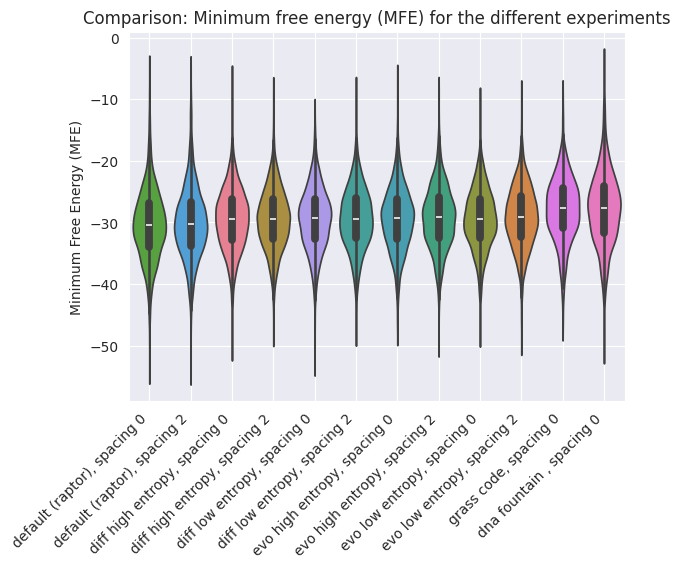

,dist,spacing,payloadxor,combination,mfe
0,diff high entropy,0,False,"diff high entropy, spacing 0, False","[-6.367171287536621, -8.79537296295166, -10.78..."
3,default (raptor),4,False,"default (raptor), spacing 4, False","[-5.7179107666015625, -7.740345001220703, -8.4..."
4,evo low entropy,2,False,"evo low entropy, spacing 2, False","[-8.739519119262695, -13.194911003112793, -13...."
9,diff high entropy,2,False,"diff high entropy, spacing 2, False","[-8.21774673461914, -8.907120704650879, -9.006..."
12,evo low entropy,0,False,"evo low entropy, spacing 0, False","[-9.898524284362793, -10.476350784301758, -10...."
13,evo high entropy,4,False,"evo high entropy, spacing 4, False","[-9.050976753234863, -9.16833782196045, -10.14..."
15,diff low entropy,4,False,"diff low entropy, spacing 4, False","[-10.14156436920166, -12.624439239501953, -12...."
16,diff high entropy,4,False,"diff high entropy, spacing 4, False","[-5.676906108856201, -9.7811861038208, -10.141..."
19,default (raptor),0,False,"default (raptor), spacing 0, False","[-5.007552623748779, -6.269567489624023, -6.85..."
20,evo high entropy,2,False,"evo high entropy, spacing 2, False","[-8.21774673461914, -8.825644493103027, -8.907..."


In [7]:
data2['combination'] = data2['dist'].astype(str) + ', spacing ' + data2['spacing'].astype(str) + (', ' + data2['payloadxor'].astype(str) if data2['payloadxor'].any() else '')
filtered_data = data2[data2['dist'].str.strip() != "dna fountain"]
filtered_data = filtered_data[filtered_data['spacing'] < 5]
filtered_data = filtered_data[filtered_data['payloadxor'] == False]

filtered_raw_data = {x["combination"]: x["mfe"] for x in data if  not "24" in x['dist'] and x['spacing'] <3 and x['payloadxor'] == False}
# plot the data:
plot_order = sorted(filtered_raw_data.keys())
plot_order.remove("dna fountain , spacing 0")
plot_order.append("dna fountain , spacing 0")
fig, ax = plt.subplots()
sns.violinplot(filtered_raw_data, ax=ax, order=plot_order)
plt.title("Comparison: Minimum free energy (MFE) for the different experiments")
ax.xaxis.label.set_rotation(45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel("Minimum Free Energy (MFE)")
ax.grid(True)
plt.savefig(f"clusts/mfe_plot/mfe_violin_cmp_no_payload_xor.svg", format="svg", dpi=1200)
plt.savefig(f"clusts/mfe_plot/mfe_violin_cmp_no_payload_xor.pdf", bbox_inches="tight")
plt.show()
filtered_data

/tmp/ipykernel_38604/3332124809.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


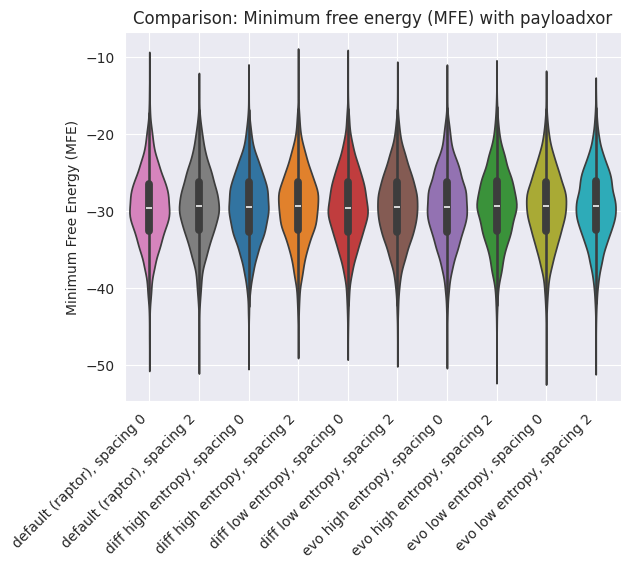

,dist,spacing,payloadxor,combination,mfe
0,diff high entropy,0,False,"diff high entropy, spacing 0, False","[-6.367171287536621, -8.79537296295166, -10.78..."
3,default (raptor),4,False,"default (raptor), spacing 4, False","[-5.7179107666015625, -7.740345001220703, -8.4..."
4,evo low entropy,2,False,"evo low entropy, spacing 2, False","[-8.739519119262695, -13.194911003112793, -13...."
9,diff high entropy,2,False,"diff high entropy, spacing 2, False","[-8.21774673461914, -8.907120704650879, -9.006..."
12,evo low entropy,0,False,"evo low entropy, spacing 0, False","[-9.898524284362793, -10.476350784301758, -10...."
13,evo high entropy,4,False,"evo high entropy, spacing 4, False","[-9.050976753234863, -9.16833782196045, -10.14..."
15,diff low entropy,4,False,"diff low entropy, spacing 4, False","[-10.14156436920166, -12.624439239501953, -12...."
16,diff high entropy,4,False,"diff high entropy, spacing 4, False","[-5.676906108856201, -9.7811861038208, -10.141..."
19,default (raptor),0,False,"default (raptor), spacing 0, False","[-5.007552623748779, -6.269567489624023, -6.85..."
20,evo high entropy,2,False,"evo high entropy, spacing 2, False","[-8.21774673461914, -8.825644493103027, -8.907..."


In [9]:
data2['combination'] = data2['dist'].astype(str) + ', spacing ' + data2['spacing'].astype(str) + (', ' + data2['payloadxor'].astype(str) if data2['payloadxor'].any() else '')
filtered_data = data2[data2['dist'].str.strip() != "dna fountain"]
filtered_data = filtered_data[filtered_data['spacing'] < 5]
filtered_data = filtered_data[filtered_data['payloadxor'] == False]

filtered_raw_data = {x["combination"].replace(", payloadxor", ""): x["mfe"] for x in data if  not "24" in x['dist'] and x['spacing'] <3 and x['payloadxor'] == True}
# plot the data:
plot_order = sorted(filtered_raw_data.keys())
#plot_order.remove("dna fountain , spacing 0")
#plot_order.append("dna fountain , spacing 0")
fig, ax = plt.subplots()
sns.violinplot(filtered_raw_data, ax=ax, order=plot_order)
ax.xaxis.label.set_rotation(45)
plt.title("Comparison: Minimum free energy (MFE) with payloadxor")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel("Minimum Free Energy (MFE)")
ax.grid(True)
plt.savefig(f"clusts/mfe_plot/mfe_violin_cmp_payload_xor.svg", format="svg", dpi=1200)
plt.savefig(f"clusts/mfe_plot/mfe_violin_cmp_payload_xor.eps", format="eps", dpi=1200)
plt.savefig(f"clusts/mfe_plot/mfe_violin_cmp_payload_xor.pdf", bbox_inches="tight")
plt.show()
filtered_data

{'diff high entropy, spacing 0': [-12.69536304473877, -12.842572212219238, -12.967467308044434, -13.28892993927002, -14.270416259765625, -14.564671516418457, -14.817665100097656, -14.932051658630371, -15.111319541931152, -15.56482219696045, -15.99885082244873, -16.35002899169922, -16.836280822753906, -17.094501495361328, -17.168458938598633, -17.172012329101562, -17.344804763793945, -17.388978958129883, -17.402931213378906, -17.43950843811035, -17.68813133239746, -17.726119995117188, -17.742977142333984, -17.765586853027344, -17.836645126342773, -17.8890380859375, -17.940656661987305, -17.94426727294922, -18.01595687866211, -18.01777458190918, -18.08246612548828, -18.138853073120117, -18.292936325073242, -18.33388900756836, -18.38474464416504, -18.40111541748047, -18.401992797851562, -18.49097442626953, -18.54702377319336, -18.56180763244629, -18.572967529296875, -18.607608795166016, -18.60898208618164, -18.68036460876465, -18.694616317749023, -18.697124481201172, -18.71051597595215, -

C:\TEMP\ipykernel_81180\994846717.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


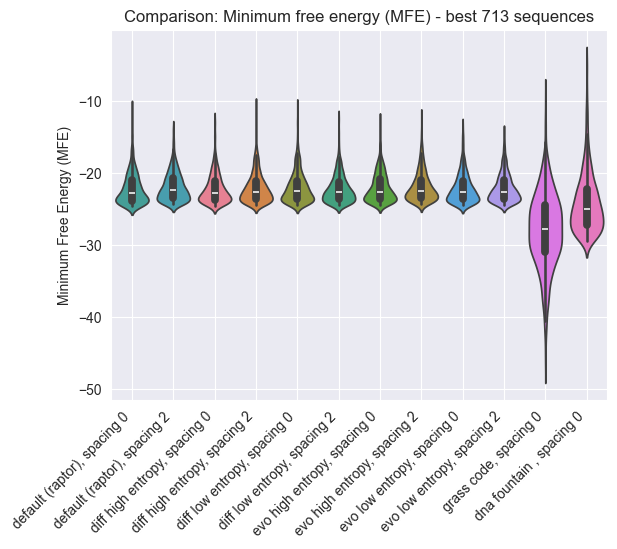

,dist,spacing,payloadxor,combination,mfe
2,diff high entropy,0,True,"diff high entropy, spacing 0, True","[-12.69536304473877, -12.842572212219238, -12...."
6,diff high entropy,2,True,"diff high entropy, spacing 2, True","[-10.647065162658691, -14.228569030761719, -15..."
8,evo high entropy,2,True,"evo high entropy, spacing 2, True","[-12.19536018371582, -13.966635704040527, -14...."
10,diff low entropy,0,True,"diff low entropy, spacing 0, True","[-10.843843460083008, -12.778847694396973, -12..."
11,evo high entropy,0,True,"evo high entropy, spacing 0, True","[-12.756632804870605, -12.778847694396973, -12..."
14,diff low entropy,2,True,"diff low entropy, spacing 2, True","[-12.341647148132324, -12.574235916137695, -14..."
18,default (raptor),0,True,"default (raptor), spacing 0, True","[-11.075674057006836, -12.88473892211914, -13...."
21,default (raptor),2,True,"default (raptor), spacing 2, True","[-13.818243980407715, -13.837645530700684, -13..."
24,evo low entropy,0,True,"evo low entropy, spacing 0, True","[-13.5272216796875, -13.534794807434082, -14.5..."
28,evo low entropy,2,True,"evo low entropy, spacing 2, True","[-14.413725852966309, -14.842761039733887, -14..."


In [12]:
data2['combination'] = data2['dist'].astype(str) + ', spacing ' + data2['spacing'].astype(str) + (', ' + data2['payloadxor'].astype(str) if data2['payloadxor'].any() else '')
filtered_data = data2[data2['dist'].str.strip() != "dna fountain"]
filtered_data = filtered_data[filtered_data['spacing'] < 3]
filtered_data = filtered_data[filtered_data['payloadxor'] == True]

filtered_raw_data = {x["combination"].replace(", payloadxor", ""): sorted(x["mfe"], reverse=True)[:713] for x in data if  not "24" in x['dist'] and x['spacing'] < 3 and (x['payloadxor'] == True or "dna fountain" in x['dist'] or "grass" in x['dist'])}
# plot the data:
plot_order = sorted(filtered_raw_data.keys())
plot_order.remove("dna fountain , spacing 0")
plot_order.append("dna fountain , spacing 0")
fig, ax = plt.subplots()
print(filtered_raw_data)
sns.violinplot(filtered_raw_data, ax=ax, order=plot_order)
ax.xaxis.label.set_rotation(45)
plt.title("Comparison: Minimum free energy (MFE) - best 713 sequences") # best 713 out of the 50.000 generated sequences - it has to be expceted that when generating all 2^32 sequences, this average will improve even further.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel("Minimum Free Energy (MFE)")
ax.grid(True)
plt.savefig(f"clusts/mfe_plot/mfe_violin_cmp_payload_xor_first_187_only.svg", format="svg", dpi=1200)
plt.savefig(f"clusts/mfe_plot/mfe_violin_cmp_payload_xor_first_187_only.pdf", bbox_inches="tight")
plt.show()
filtered_data

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing0.fasta


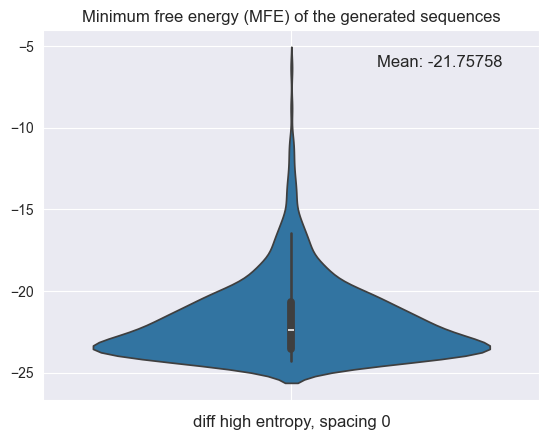

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing4_payloadxor.fasta


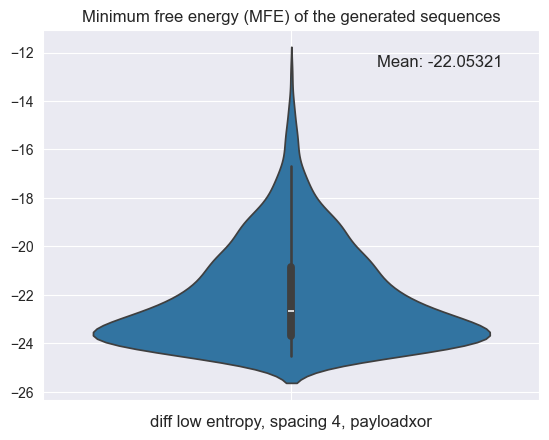

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing0_payloadxor.fasta


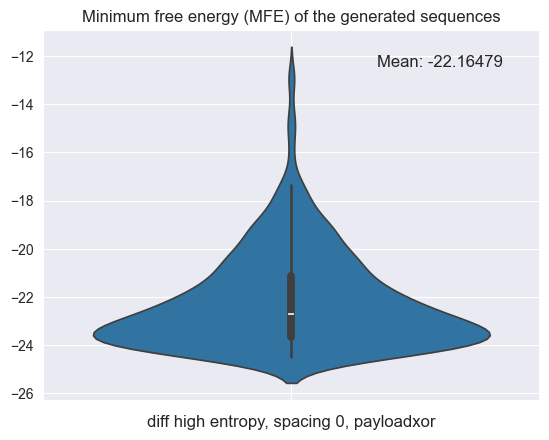

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing4.fasta


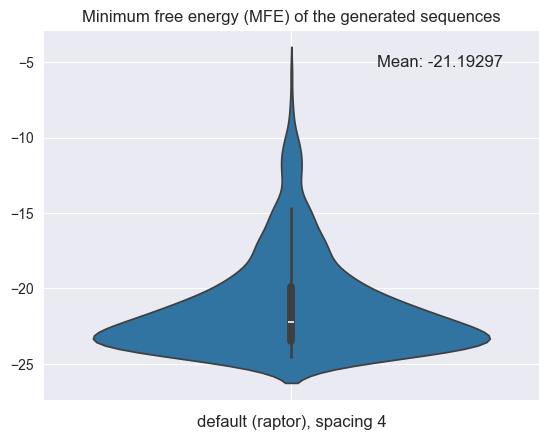

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing2.fasta


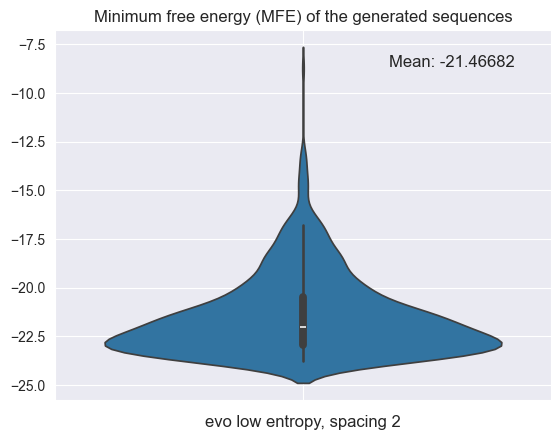

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing4_payloadxor.fasta


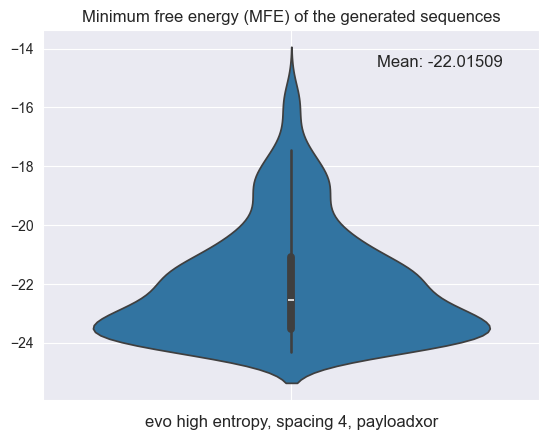

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing2_payloadxor.fasta


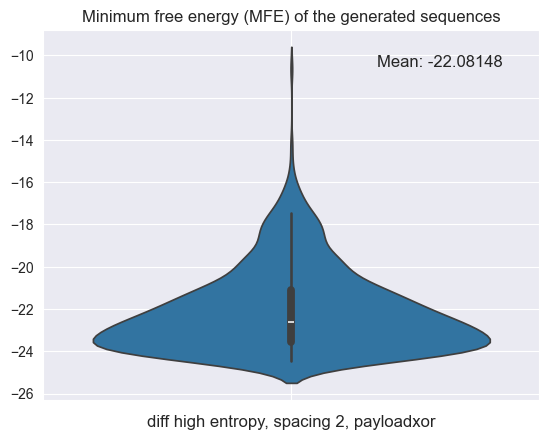

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing4_payloadxor.fasta


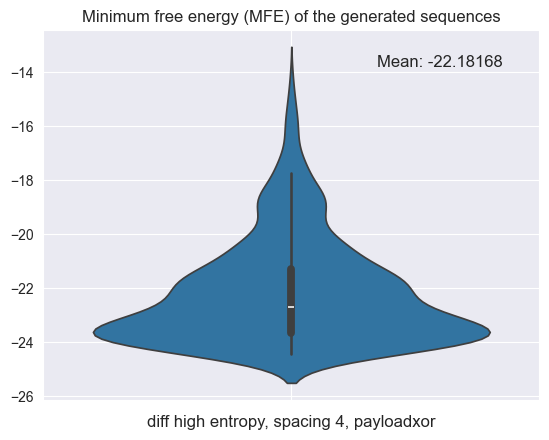

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing2_payloadxor.fasta


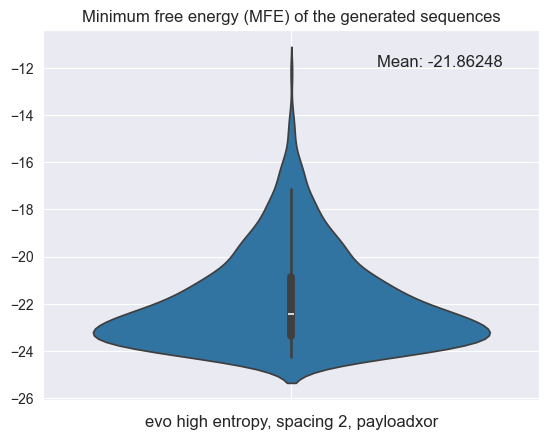

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing2.fasta


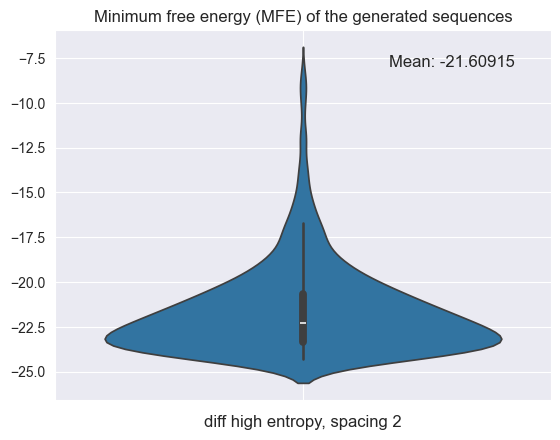

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing0_payloadxor.fasta


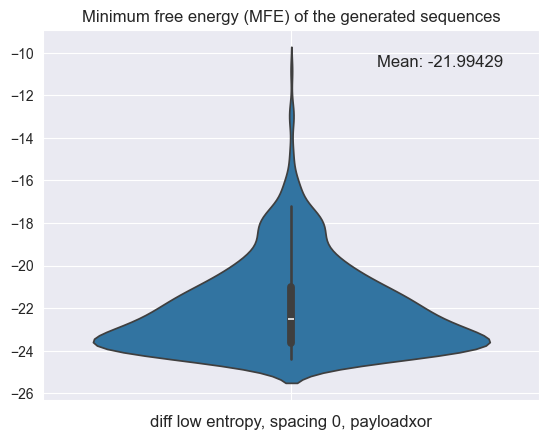

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing0_payloadxor.fasta


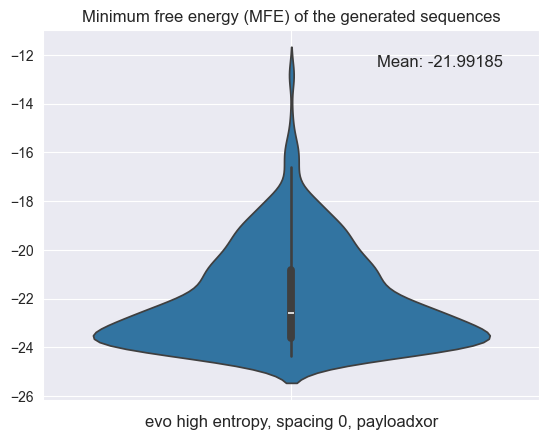

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing0.fasta


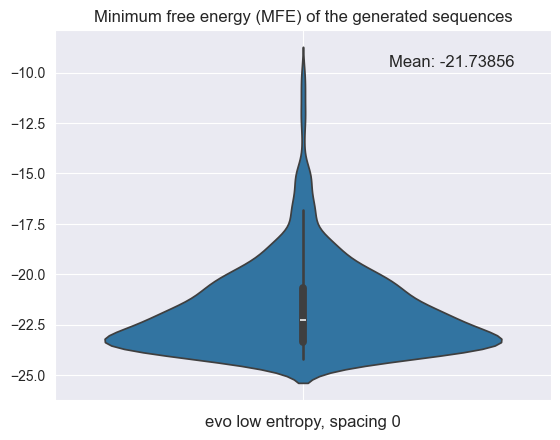

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing4.fasta


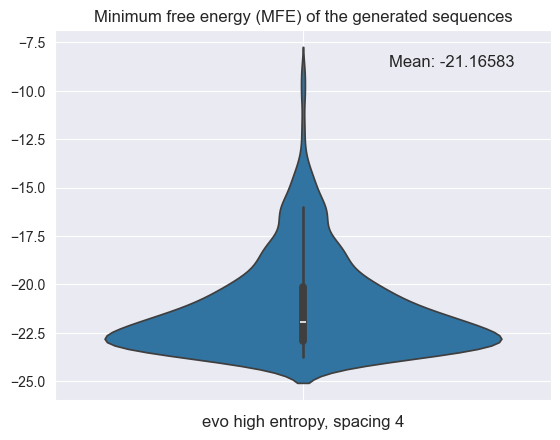

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing2_payloadxor.fasta


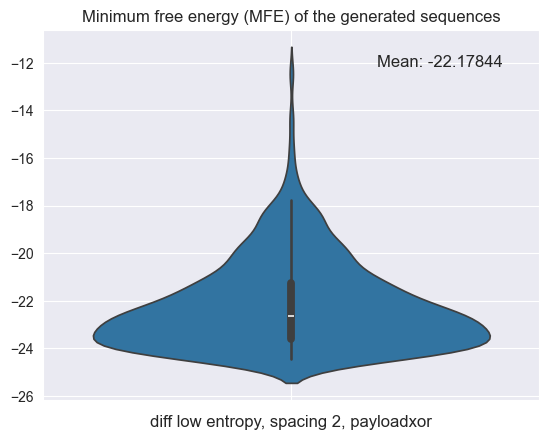

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing4.fasta


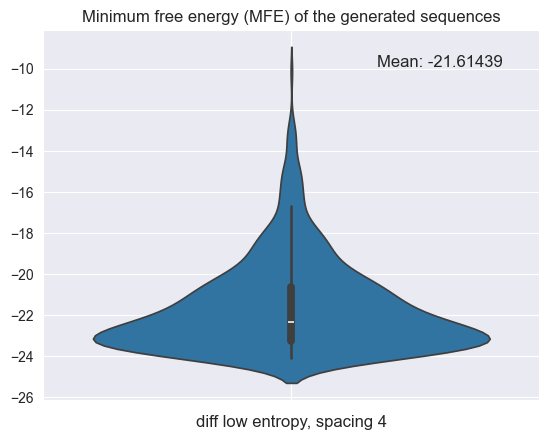

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_diff_compress_encrypt_high_entropy_dist_seedspacing4.fasta


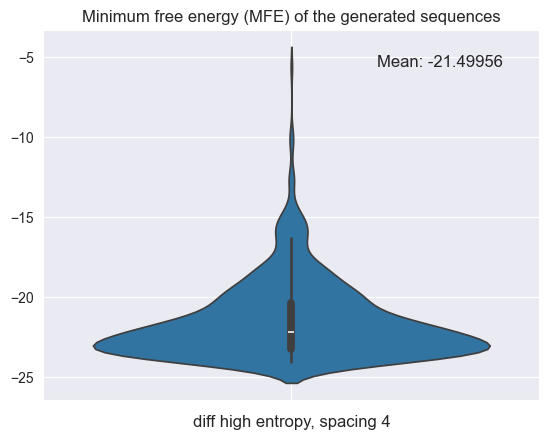

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing4_payloadxor.fasta


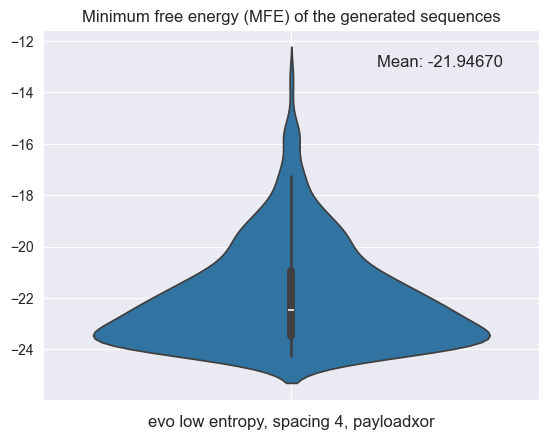

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing0_payloadxor.fasta


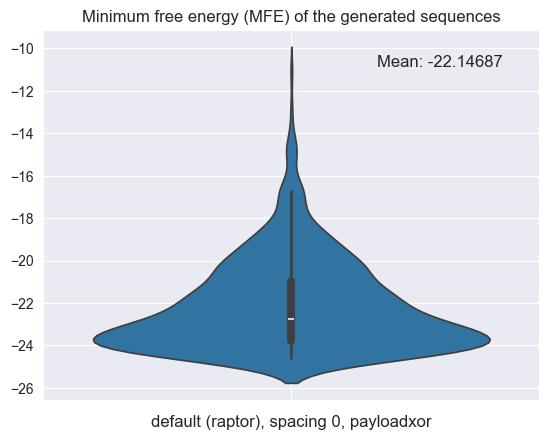

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing0.fasta


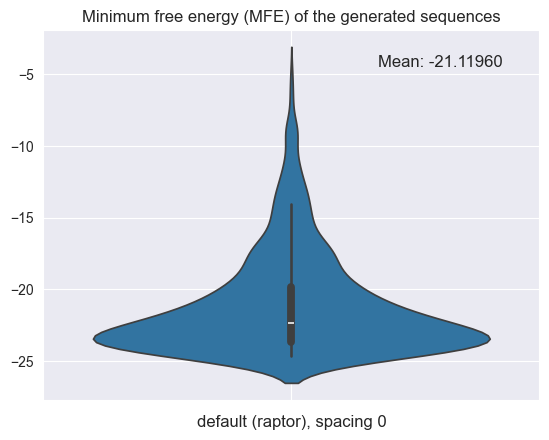

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing2.fasta


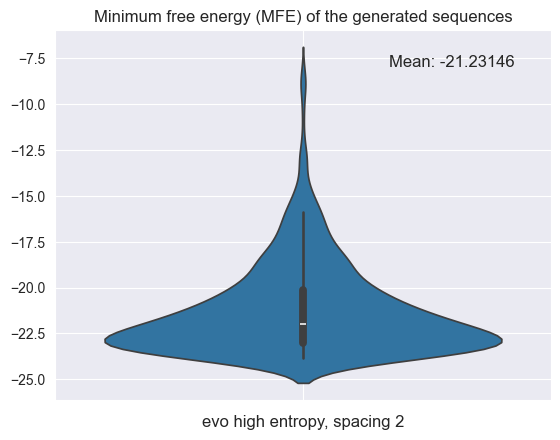

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing2_payloadxor.fasta


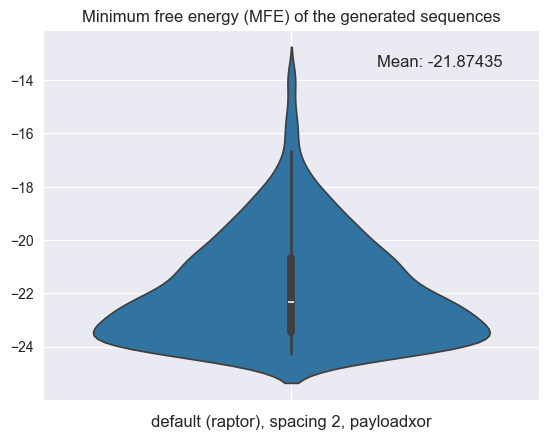

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing2.fasta


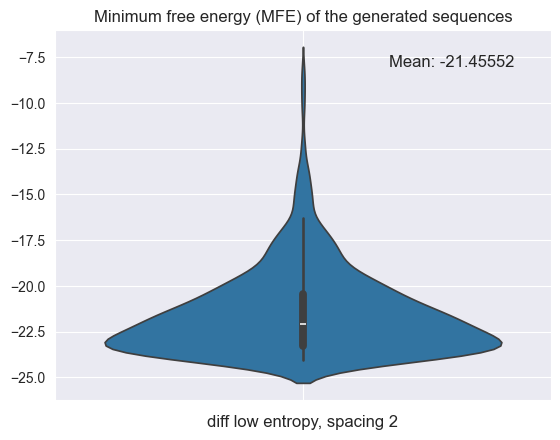

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing4_payloadxor.fasta


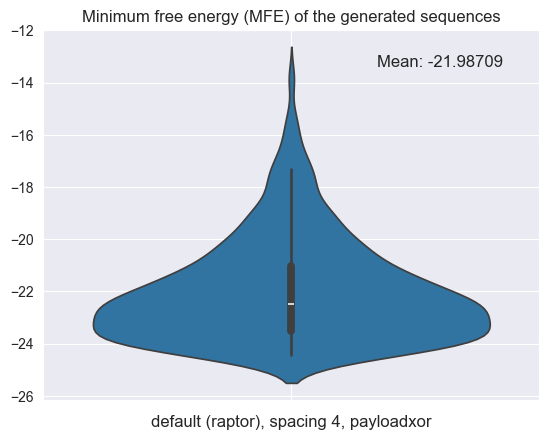

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing0_payloadxor.fasta


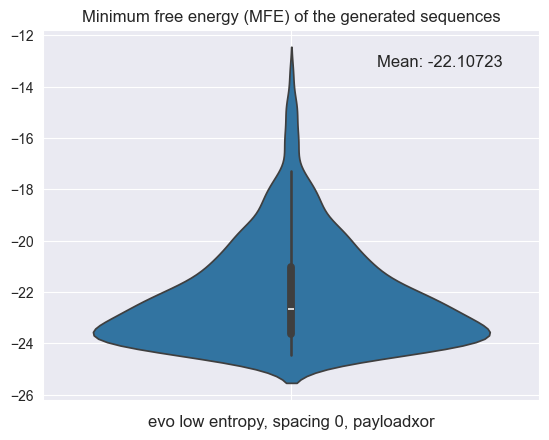

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing4.fasta


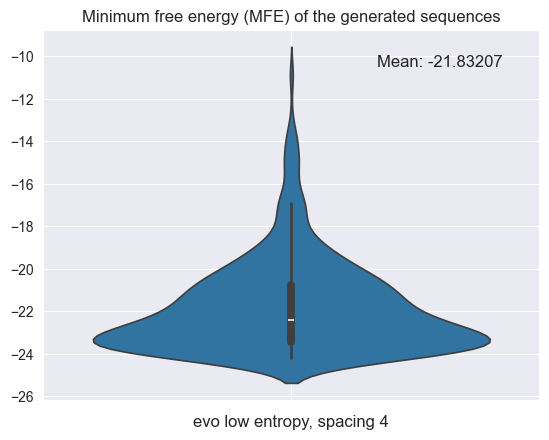

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_evo_compress_encrypt_high_entropy_dist_seedspacing0.fasta


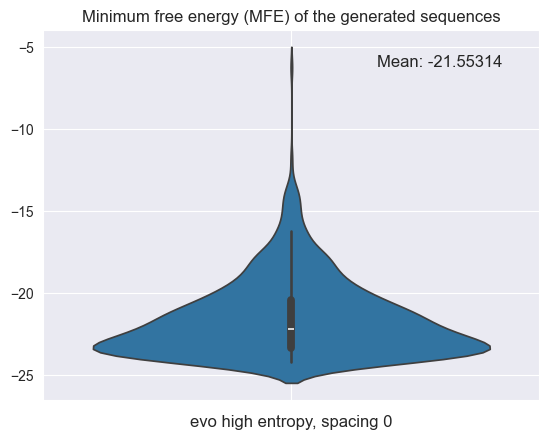

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_raptor_seedspacing2.fasta


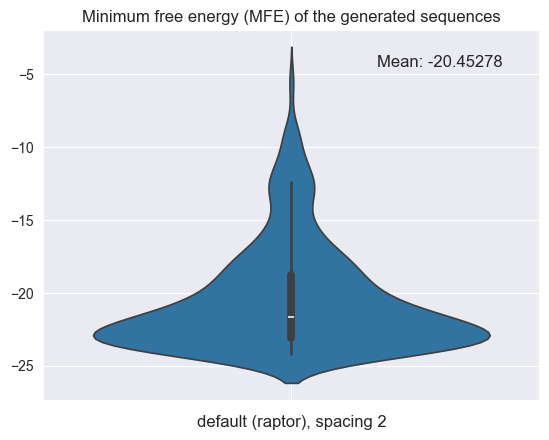

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_evo_dist_seedspacing2_payloadxor.fasta


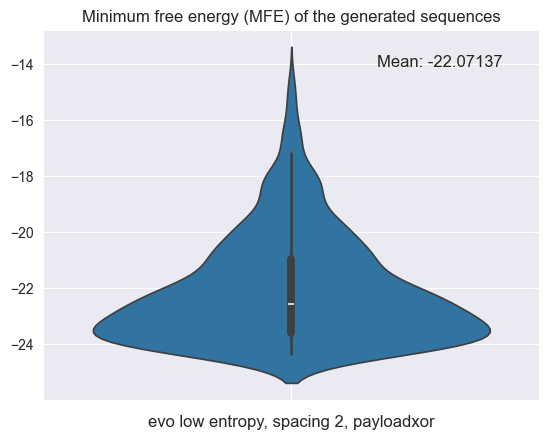

clusts/cs_23_I_max_2_hp_10_gc_opt_sleeping_beauty_150_bmp_low_entropy_diff_dist_seedspacing0.fasta


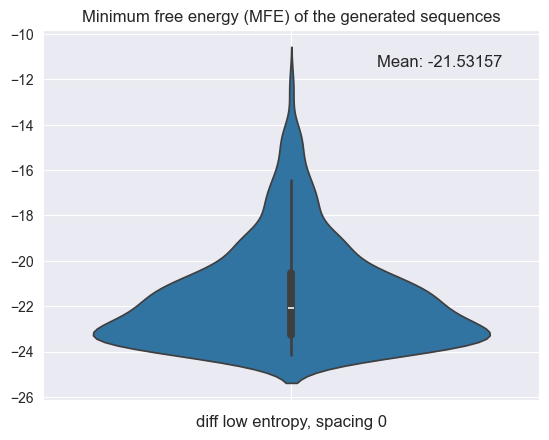

clusts/sleeping_beauty_grass.fasta


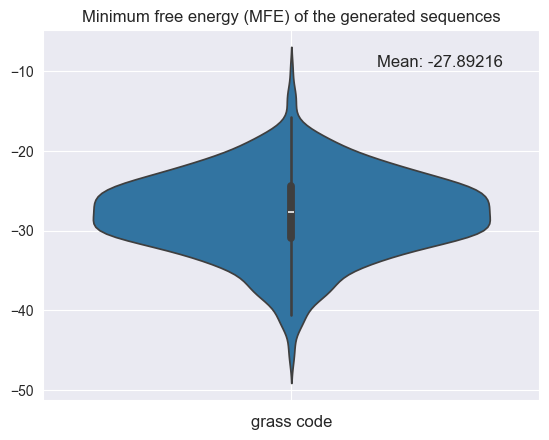

clusts/sleeping_beauty_dna_fountain_cs23.fasta


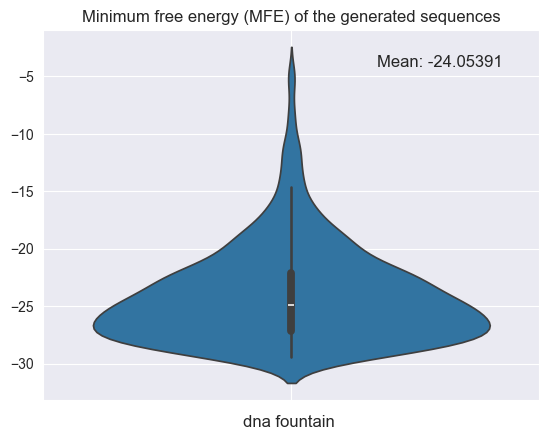

clusts/sleeping_beauty_dna_fountain_24.fasta


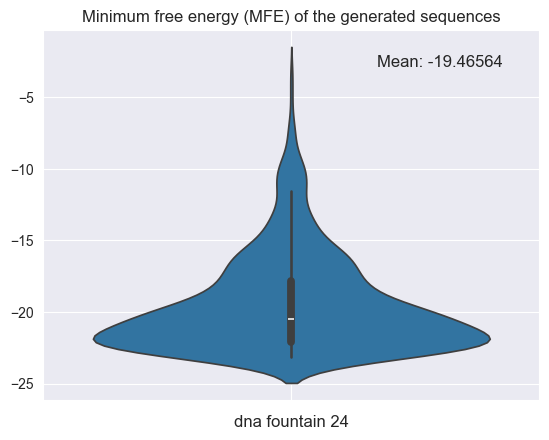

In [9]:
#for key, value in df.items():
#    value = sorted(value, reverse=True)[:713]
#    # create a violin plot usin seaborn:
#    import seaborn as sns
#    import matplotlib.pyplot as plt
#    sns.violinplot(data=value)
#    key_title = key.replace('clusts\\cs_25_max_2_hp_10_gc_opt_sleeping_beauty_150_', '').replace('.fasta', '').replace('_', ' ')
#    plt.title(f"{key_title} (Mean: {np.mean(value)})")
#    plt.show()

    
for key, value in df.items():
    # create a violin plot usin seaborn:
    value = sorted(value, reverse=True)[:713]
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    sns.violinplot(data=value, ax=ax)
    print(key)
    try:
        conf_name = key.split('sleeping_beauty_150_')[1] 
        key_title = conf_name.replace("compress_encrypt_high_entropy_dist","high entropy,").replace("bmp_low_entropy_diff_dist", "diff low entropy,").replace("bmp_low_entropy_evo_dist", "evo low entropy,").replace("raptor", "default (raptor),")
    except:
        conf_name = key.replace("clusts/", "")
        key_title = conf_name
    key_title = key_title.replace("sleeping_beauty_", "").replace("seedspacing", "spacing ").replace('_', ' ').replace(" payloadxor", ", payloadxor").replace('.fasta', '').replace("grass", "grass code").replace("cs23", "")
        # Add the mean value to the plot using plt.text()
    plt.text(0.8, 0.9, f"Mean: {np.mean(value):.5f}", transform=ax.transAxes, fontsize=12, ha='center')
    
    #plt.title(f"{key_title}")
    plt.title("Minimum free energy (MFE) of the generated sequences")
    plt.xlabel(key_title, fontsize=12)
    plt.grid(True)
    plt.savefig(f"clusts/mfe_plot/cmp_mfe_violin_{conf_name}.svg", format="svg", dpi=1200)
    plt.savefig(f"clusts/mfe_plot/cmp_mfe_violin_{conf_name}.pdf", bbox_inches="tight")
    plt.show()
    

In [10]:
a = "CCAGTTGCCTCCACGATTCCATTCTATTCATTCGAATAGGGTCAAACCCGTAATCACCGGAGACCCTGTCATGTTTCGTCTCCGTTGTAATCCAGGACAGCCCAAAGGTTCCCGTAGTGAAGCAAGCAAGGCCTCTTAAAGGCGTCCG"
len(a)
import RNA
rna = RNA.fold_compound(a)
pf = rna.pf()[1]
pf

-36.842159271240234